In [18]:
import numpy as np
import sys
# demonstrate the graph structure build up
import operator
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
sys.path.append('/Users/swu/Desktop/research/HCM/MouseHCM/HSTC')
import json


a_file = open("/Users/swu/Desktop/research/HCM/MouseHCM/HSTC/visual_chunksgraphstructure.json", "r")
learned_graph = json.loads(a_file.read())
graphchunk = np.load('/Users/swu/Desktop/research/HCM/MouseHCM/HSTC/visual_chunksgraphchunk.npy', allow_pickle=True)

vertex_list = np.arange(0, len(learned_graph['vertex_location']))
vertex_location = learned_graph['vertex_location'] 
edge_list = learned_graph['edge_list']


In [17]:
data.shape

(48, 1)

<ipython-input-19-9303908c302a>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


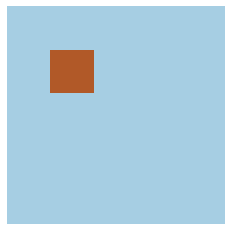

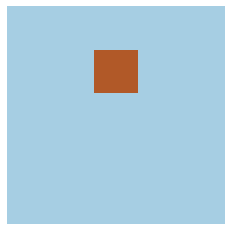

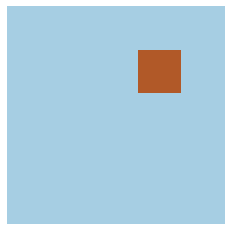

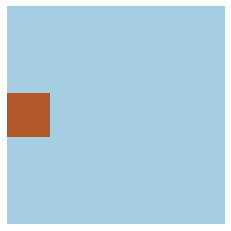

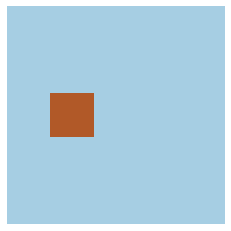

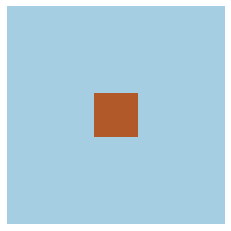

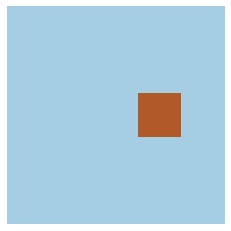

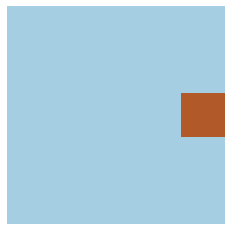

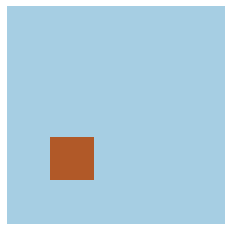

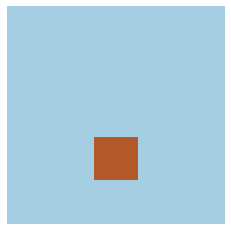

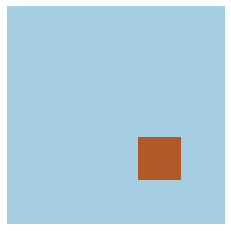

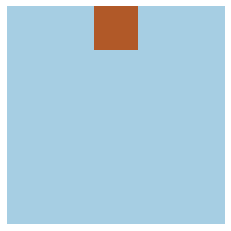

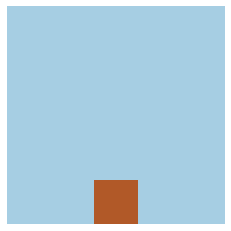

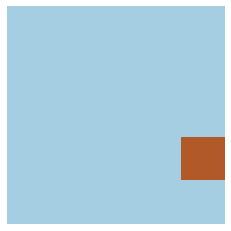

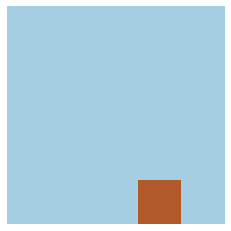

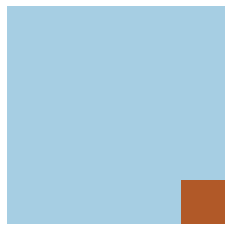

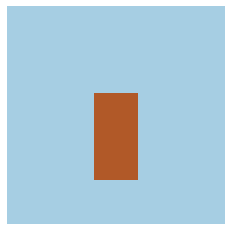

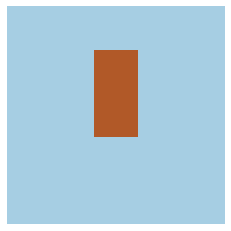

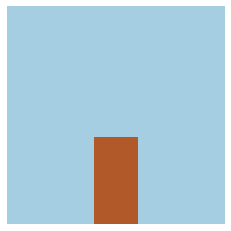

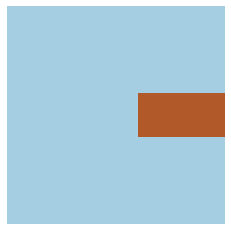

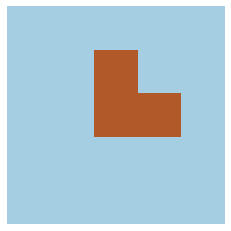

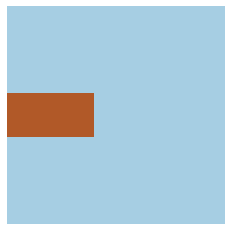

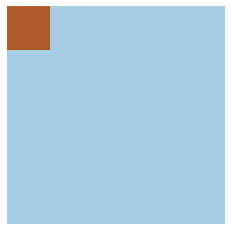

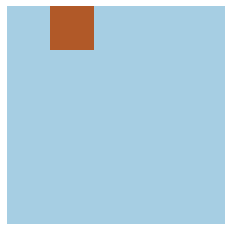

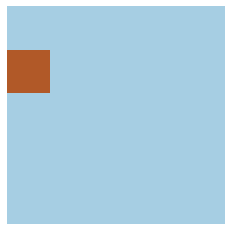

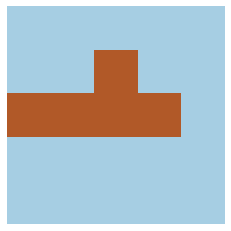

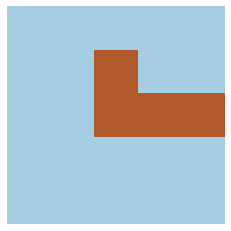

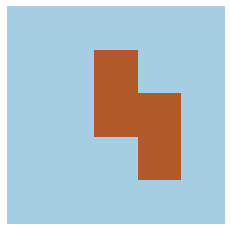

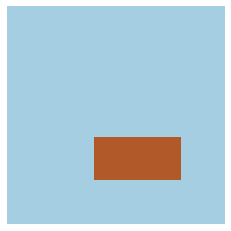

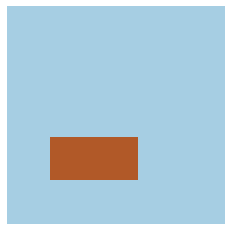

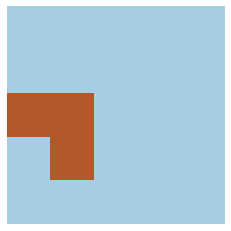

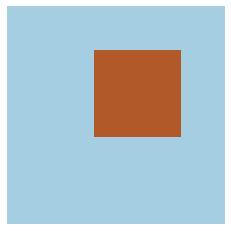

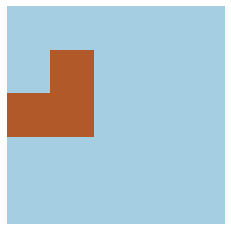

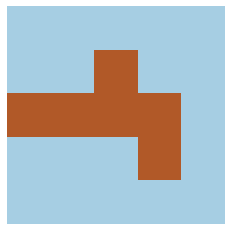

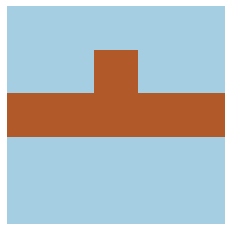

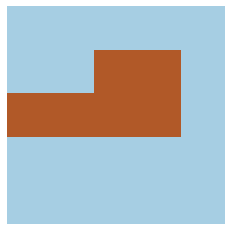

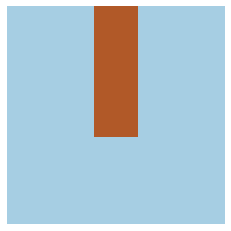

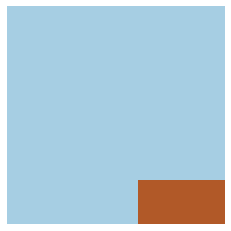

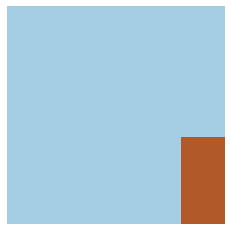

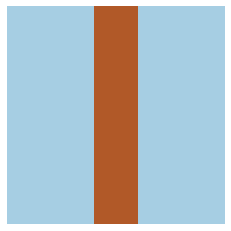

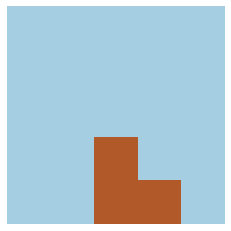

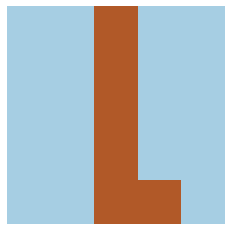

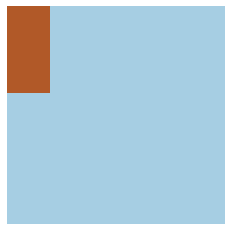

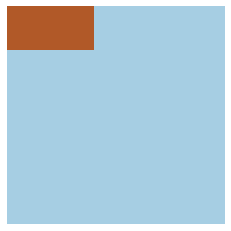

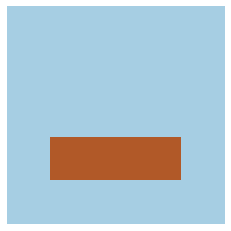

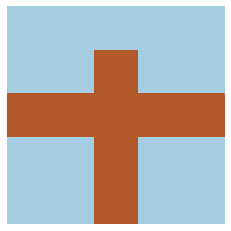

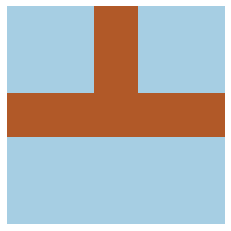

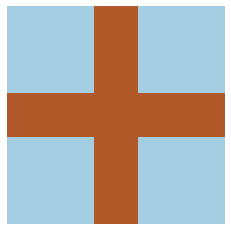

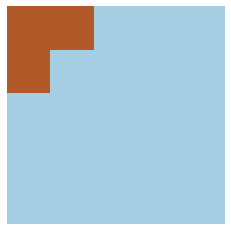

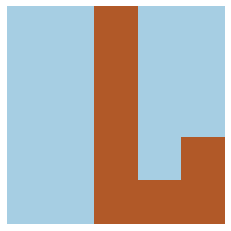

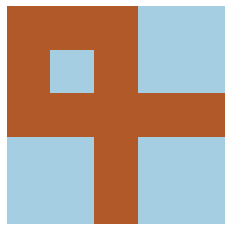

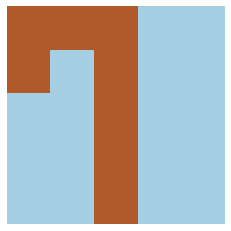

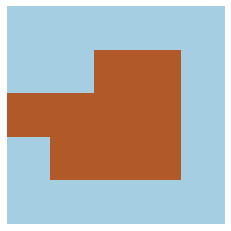

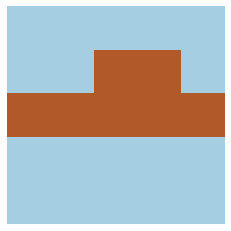

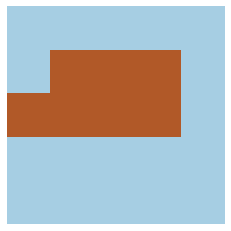

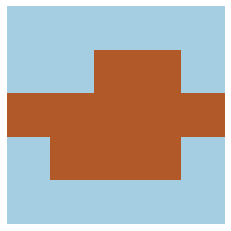

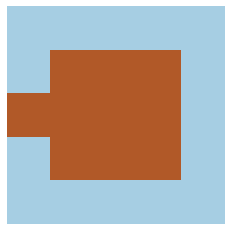

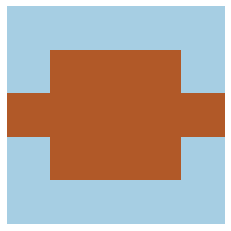

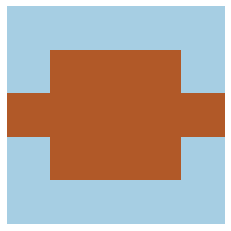

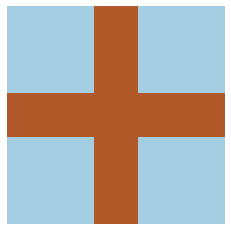

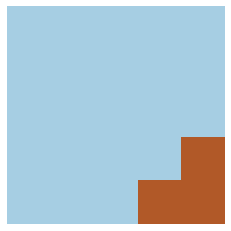

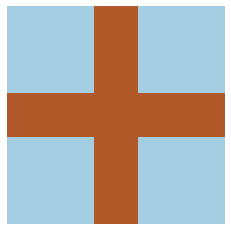

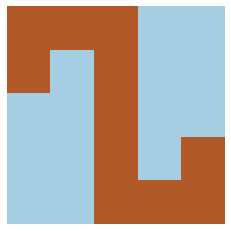

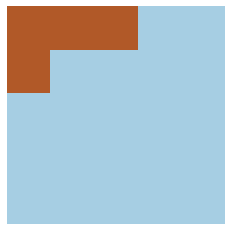

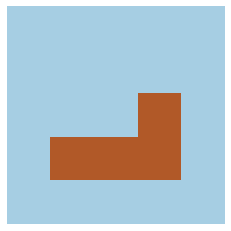

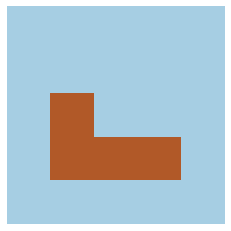

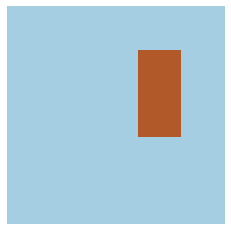

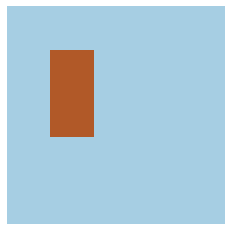

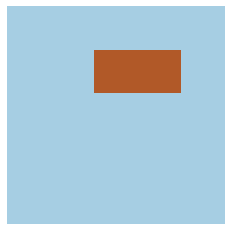

In [19]:
blue = '#ADCDE0'
brown = '#A65E34'
# save graphchunk as images
from PIL import Image
for i in range(0, len(graphchunk)):
    fig = plt.figure()
    chunkarray = graphchunk[i]
    data = chunkarray[0,:,:]
    plt.imshow(data,cmap = 'Paired')
    plt.axis("off")
    savepath = '/Users/swu/Desktop/research/HCM/MouseHCM/HSTC/img/' + str(i) + '.jpeg'
    plt.savefig(savepath)

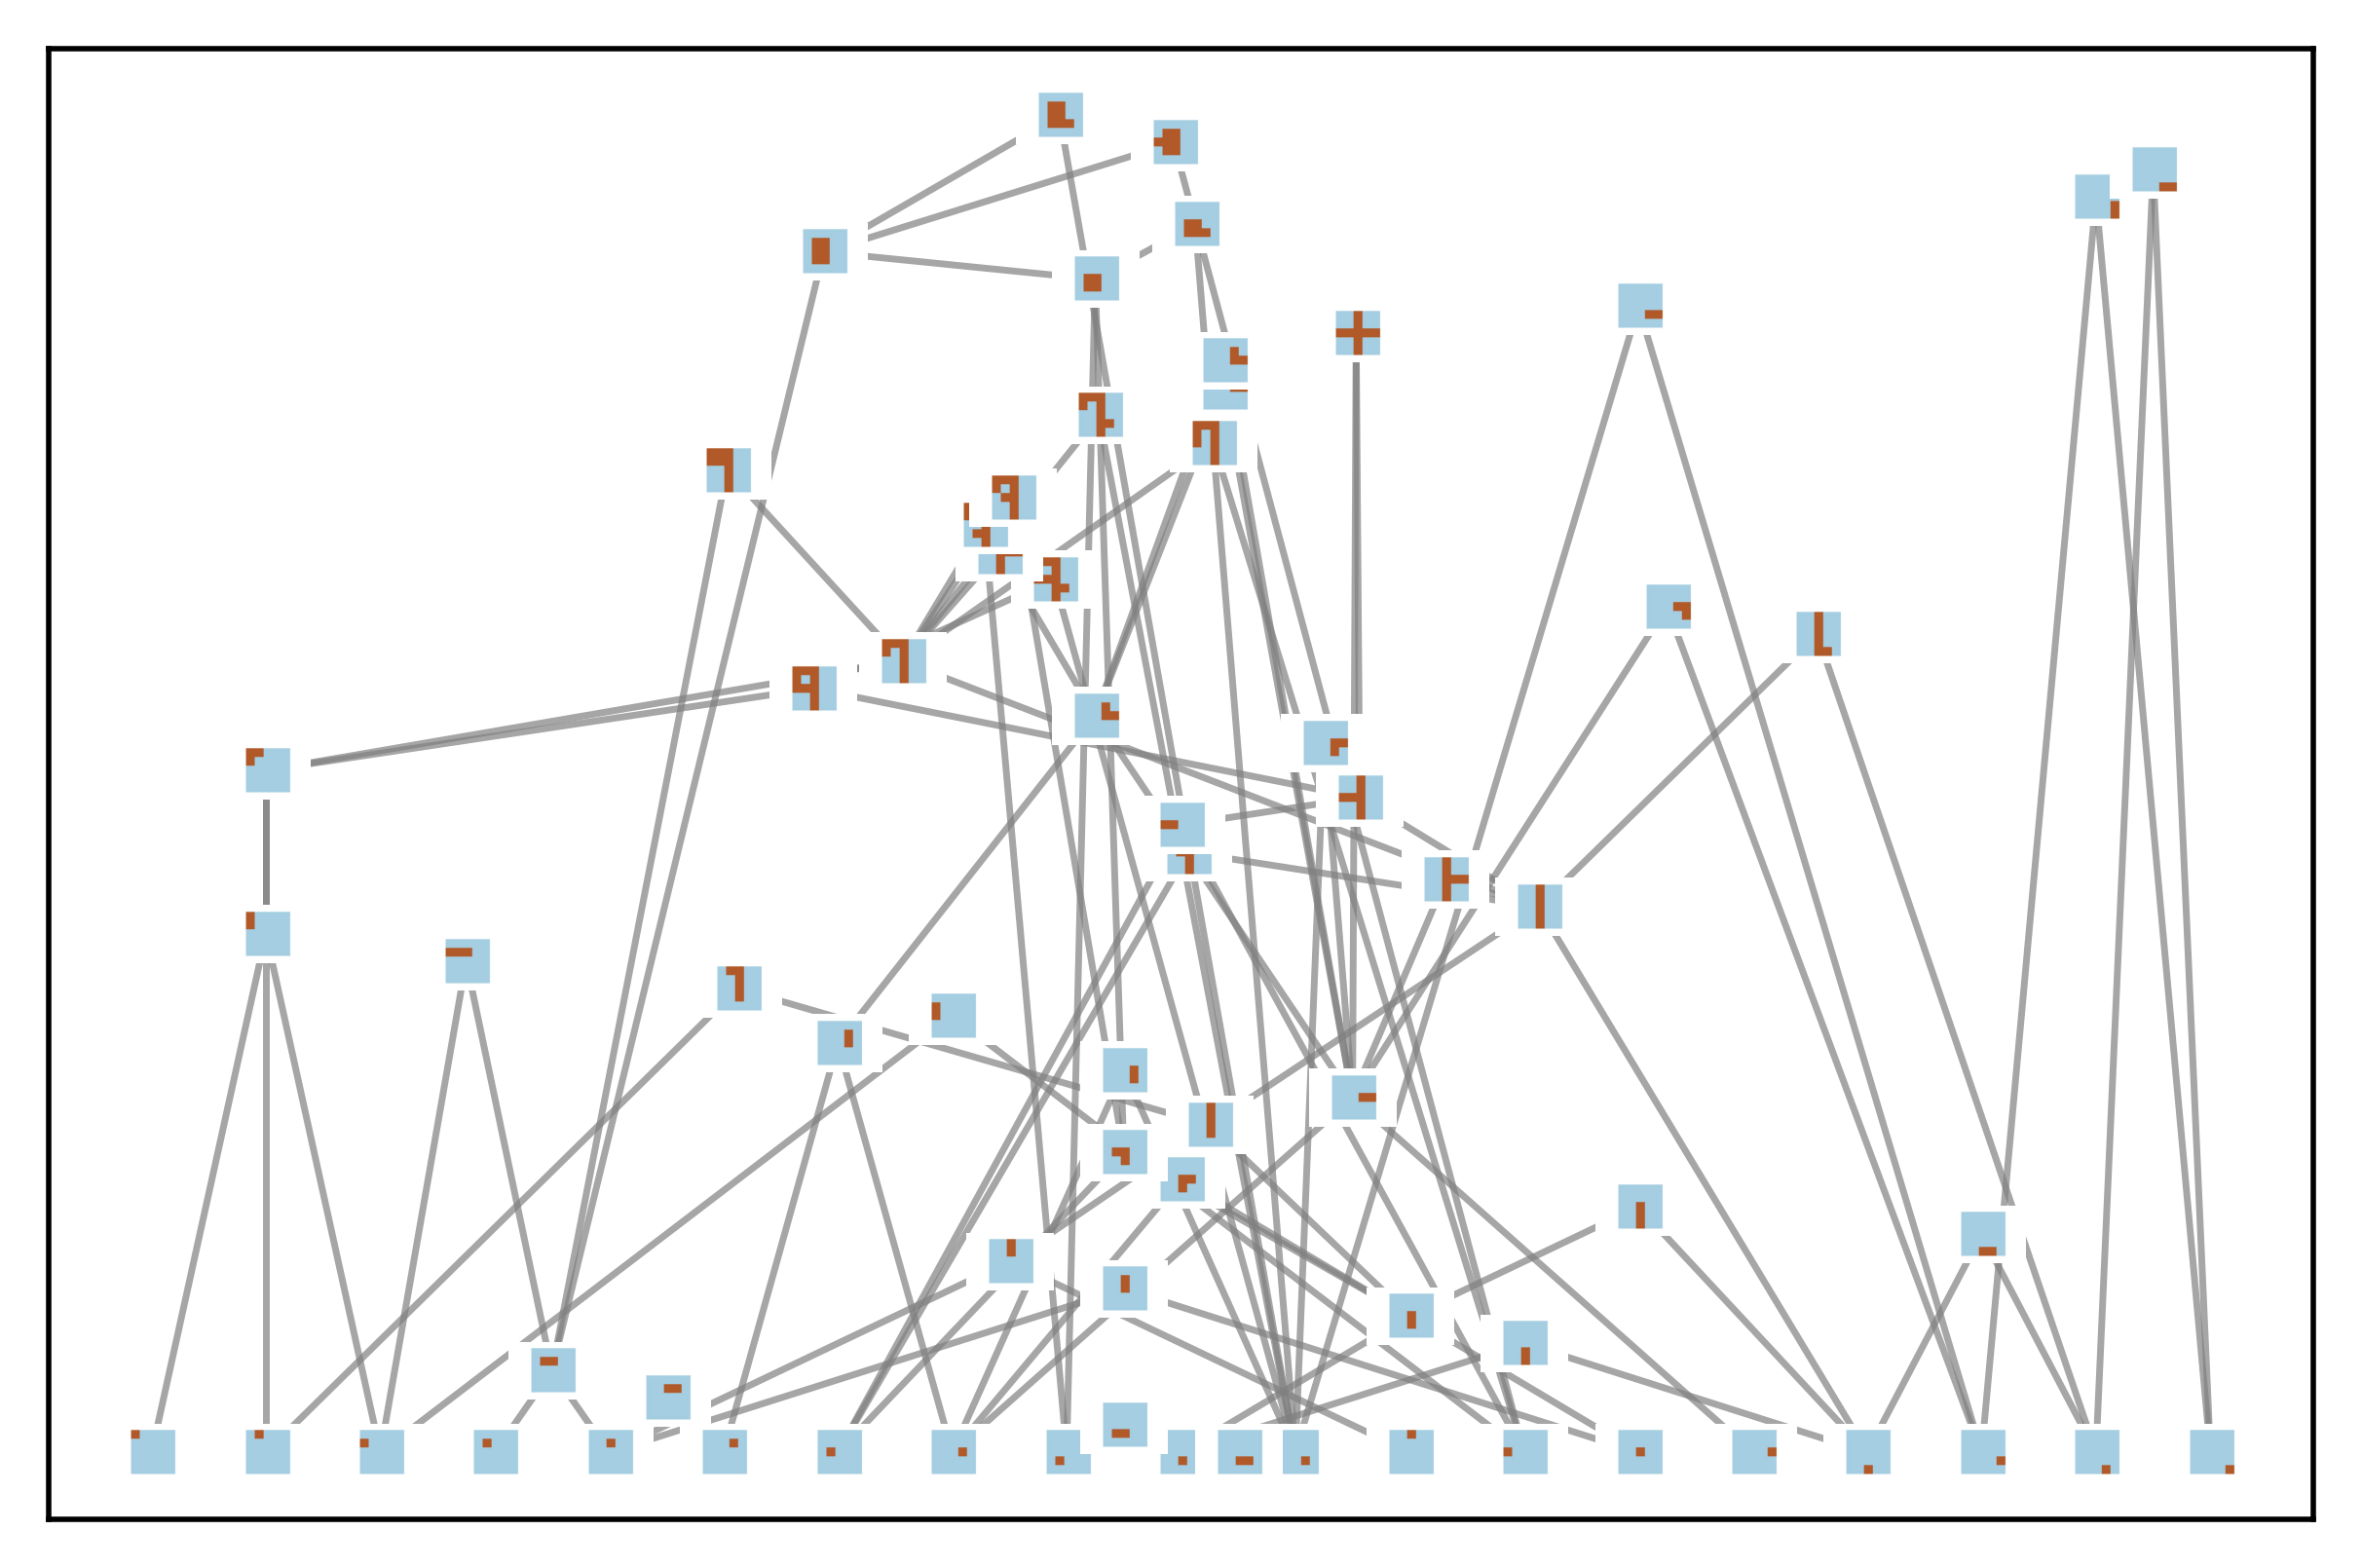

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import PIL

images = {}

for i in range(0, len(graphchunk)):
    fname = '/Users/swu/Documents/MouseHCM/HSTC/img/' + str(i) + '.jpeg'
    images[int(i)] = PIL.Image.open(fname)
    
G = nx.Graph()

for node in vertex_list:
    G.add_node(node, pos = vertex_location[node], image=images[node])

for edge in edge_list:
    G.add_edge(edge[0], edge[1], weight=0)


# Get a reproducible layout and create figure
fig, ax = plt.subplots(dpi = 500)

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`
pos = vertex_location

edge_color = ['k' if weight else 'grey' for weight in nx.get_edge_attributes(G,'weight').values()]

nx.draw_networkx(G, pos,
                    node_color='grey',
                    node_size=0.0001,
                    #connectionstyle='arc3, rad = 0.1',
                    arrowsize=15,
                    width=1,
                    with_labels=False,
                    edge_color=edge_color,
                    alpha = 0.7,
                    ax=ax)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.0015
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")
plt.show()